# INF8225 TP1 H22 (v0.1)

Ali Kbar - Sabzi Dizajyekan / Matricule 2078921

Partie 3 réalisée: 
 avec 
*   Mathusan Kathirithamby -2113367


Date limite : 8h30 le 28 février 2022

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

# Partie 1 (10 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


<img src="https://drive.google.com/uc?id=1UhYF6_QGTHGpR5VBg-RKvr8jJWJPN12A" alt="bayes_net" width="600"/>


Voici les tables de probabilités conditionnelles fournies:

* La probabilité qu'il est Nuageux: $Pr(N=1)=0.2$
* La probabilité que l'arroseur a été utilisé sachant qu'il est nuageux ou non: $Pr(A=1|N=1)=0.1$, $Pr(A=1|N=0)=0.3$ 
* La probabilité qu'il ait plu, étant donné que le temps est nuageux: $Pr(P=1|N=1)=0.4$, $Pr(P=1|N=0)=0.1$
* La probabilité que le gazon de Watson soit mouillé...
  * ... sachant qu'il a plu est $Pr(W=1|P=1)=1$
  *... sachant qu'il n'a $\textbf{pas}$ plu: $Pr(W=1|P=0)=0.2$
* La probabilité que Holmes remarque que son gazon est mouillé...
  * ... sachant que l’arroseur a fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=1)=0.9$
  * ... sachant que l’arroseur n'a $\textbf{pas}$ fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=0) = 0$
  * ... sachant qu'il a plu, et que l'arroseur ait ou pas fonctionné: $Pr(H=1|P=1, A={0,1})=1$

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : temps nuageux (N)
axe 1 : pluie (P)
axe 2 : arroseur (A)
axe 3 : gazon de watson (W)
axe 4 : gazon de holmes (H)
```
Chaque `axe` serait de dimension `2`:
```
0 : faux
1 : vrai
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [ ]:
import numpy as np

# Les tableaux sont bâtis avec les dimensions (N, P, A, W, H)
# et chaque dimension est (False, True)

Pr_N = np.array([0.8, 0.2]).reshape(2, 1, 1, 1, 1)
Pr_P_given_N = np.array([[0.9, 0.1],[0.6,0.4]]).reshape(2, 2, 1, 1, 1)
Pr_A_given_N = np.array([[0.7, 0.3],[0.9,0.1]]).reshape(2, 1, 2, 1, 1)
Pr_W_given_P = np.array([[0.8, 0.2],[0,1]]).reshape(1, 2, 1, 2, 1)
Pr_H_given_PA = np.array([[1, 0],[0.1, 0.9],[0,1], [0, 1]]).reshape(1, 2, 2, 1, 2)

print (f"Pr(N)=\n{np.squeeze(Pr_N)}\n")
print (f"Pr(P|N)=\n{np.squeeze(Pr_P_given_N)}\n")
print (f"Pr(A|N)=\n{np.squeeze(Pr_A_given_N)}\n")
print (f"Pr(W|P)=\n{np.squeeze(Pr_W_given_P)}\n")
print (f"Pr(H|P,A)=\n{np.squeeze(Pr_H_given_PA)}\n")

Pr(N)=
[0.8 0.2]

Pr(P|N)=
[[0.9 0.1]
 [0.6 0.4]]

Pr(A|N)=
[[0.7 0.3]
 [0.9 0.1]]

Pr(W|P)=
[[0.8 0.2]
 [0.  1. ]]

Pr(H|P,A)=
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous.

a) $Pr(H=1)$

 
$$ Pr(H=1) = \sum_{N} \sum_{P} \sum_{A} \sum_{W} Pr(N)Pr(P|N)Pr(A|N) P(W|P) Pr(H=1|A,P) $$  

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N*Pr_W_given_P*Pr_H_given_PA[:,:,:,:,1:]))
 print(f"Pr(H=1)={answer:.5f}")

Pr(H=1)=0.36520


b) $Pr(H=1|A=1)$

$$Pr(H=1|A=1) = \frac{Pr(H=1,A=1)}{Pr(A=1)} $$
$$ Pr(A=1) =\sum_{N} \sum_{P} \sum_{W} \sum_{H}  Pr(N,P,A=1,W,H)=\sum_{N} \sum_{P} \sum_{W} \sum_{H} Pr(N)Pr(P|N)Pr(A=1|N) P(W|P) Pr(H|A=1,P) $$  
$$ Pr(H=1,A=1) = \sum_{N} \sum_{P} \sum_{W} Pr(N,P,A=1,W,H=1)=\sum_{N} \sum_{P} \sum_{W}  Pr(N)Pr(P|N) Pr(A=1|N) P(W|P) Pr(H=1|P,A=1)) $$  

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N[:,:,1:,:,:]*Pr_W_given_P*Pr_H_given_PA[:,:,1:,:,1:]))/np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N[:,:,1:,:,:]*Pr_W_given_P*Pr_H_given_PA[:,:,1:,:,:]))
 print(f"Pr(H=1|A=1)={answer:.5f}")

Pr(H=1|A=1)=0.91231


c) $Pr(H=1|do(A=1))$

$$Pr(H=1|do(A=1))=\sum_{N} \sum_{P} \sum_{W}  Pr(N,P,W,H=1|do(A=1))=\sum_{N} \sum_{P} \sum_{W} Pr(N)Pr(P|N) P(W|P) Pr(H=1|P,do(A=1))  $$

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N*Pr_W_given_P*Pr_H_given_PA[:,:,1:,:,1:]))
 print(f"Pr(H=1|do(A=1))={answer:.5f}")

Pr(H=1|do(A=1))=0.91600


d) $Pr(H=1|W=1)$

$$Pr(H=1|W=1) = \frac{Pr(H=1,W=1)}{Pr(W=1)} $$
$$ Pr(W=1) =\sum_{N} \sum_{P} \sum_{A} \sum_{H}  Pr(N,P,A,W=1,H)=\sum_{N} \sum_{P} \sum_{A} \sum_{H} Pr(N)Pr(P|N)Pr(A|N) P(W=1|P) Pr(H|A,P) $$  
$$ Pr(H=1,W=1) = \sum_{N} \sum_{P} \sum_{A} Pr(N,P,A,W=1,H=1)=\sum_{N} \sum_{P} \sum_{A}  Pr(N)Pr(P|N) Pr(A|N) P(W=1|P) Pr(H=1|P,A)) $$  

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N*Pr_W_given_P[:,:,:,1:,:]*Pr_H_given_PA[:,:,:,:,1:]))/np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N*Pr_W_given_P[:,:,:,1:,:]*Pr_H_given_PA))
 print(f"Pr(H=1|W=1)={answer:.5f}")

Pr(H=1|W=1)=0.61293


e) $Pr(H=1|do(W=1))$

$$ Pr(H=1|do(W=1)) = \sum_{N} \sum_{P} \sum_{A} Pr(N,P,A,H=1|do(w=1))=\sum_{N} \sum_{P} \sum_{A}  Pr(N)Pr(P|N) Pr(A|N) Pr(H=1|P,A,do(w=1))) $$  

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N*Pr_A_given_N*Pr_H_given_PA[:,:,:,:,1:]))
 print(f"Pr(H=1|do(W=1))={answer:.5f}")

Pr(H=1|do(W=1))=0.36520


f) $Pr(W=1|P=1)$

$$Pr(W=1|P=1) = \frac{Pr(W=1,P=1)}{Pr(P=1)} $$
$$ Pr(P=1) =\sum_{N}  \sum_{A} \sum_{W} \sum_{H}  Pr(N,P=1,A,W,H)=\sum_{N}  \sum_{A} \sum_{W} \sum_{H} Pr(N)Pr(P=1|N)Pr(A|N)Pr(W|P=1) Pr(H|A,P=1) $$  
$$ Pr(W=1,P=1) = \sum_{N} \sum_{A} \sum_{H} Pr(N,P=1,A,W=1,H)=\sum_{N}  \sum_{A}\sum_{H}  Pr(N)Pr(P=1|N) Pr(A|N) P(W=1|P=1) Pr(H|P=1,A)) $$  

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N[:,1:,:,:,:]*Pr_A_given_N*Pr_W_given_P[:,1:,:,1:,:]*Pr_H_given_PA[:,1:,:,:,:]))/np.sum((Pr_N*Pr_P_given_N[:,1:,:,:,:]*Pr_A_given_N*Pr_W_given_P[:,1:,:,:,:]*Pr_H_given_PA[:,1:,:,:,:]))
 print(f"Pr(W=1|P=1)={answer:.5f}")

Pr(W=1|P=1)=1.00000


g) $Pr(W=1|do(P=1))$

$$Pr(W=1|do(P=1))=\sum_{N} \sum_{A} \sum_{H}  Pr(N,P,W=1|do(P=1),H))=\sum_{N} \sum_{A} \sum_{H} Pr(N)Pr(A|N) P(W=1|do(P=1)) Pr(H|do(P=1),A))  $$

In [ ]:
 answer = np.sum(Pr_N*Pr_A_given_N*Pr_W_given_P[:,1:,:,1:,:]*Pr_H_given_PA[:,1:,:,:,:])
 print(f"Pr(W=1|do(P=1))={answer:.5f}")

Pr(W=1|do(P=1))=1.00000


h) $Pr(H=1|P=1)$ 

$$Pr(H=1|P=1) = \frac{Pr(H=1,P=1)}{Pr(P=1)} $$
$$ Pr(P=1) =\sum_{N} \sum_{A} \sum_{W} \sum_{H}  Pr(N,P=1,A,W,H)=\sum_{N} \sum_{A} \sum_{W} \sum_{H} Pr(N)Pr(P=1|N)Pr(A|N) P(W|P=1) Pr(H|A,P=1) $$  
$$ Pr(H=1,P=1) = \sum_{N} \sum_{A} \sum_{W} Pr(N,P=1,A,W,H=1)=\sum_{N} \sum_{A} \sum_{W}  Pr(N)Pr(P=1|N) Pr(A|N) P(W|P=1) Pr(H=1|P=1,A)) $$ 

In [ ]:
 answer = np.sum((Pr_N*Pr_P_given_N[:,1:,:,:,:]*Pr_A_given_N*Pr_W_given_P[:,1:,:,:,:]*Pr_H_given_PA[:,1:,:,:,1:]))/np.sum((Pr_N*Pr_P_given_N[:,1:,:,:,:]*Pr_A_given_N*Pr_W_given_P[:,1:,:,:,:]*Pr_H_given_PA[:,1:,:,:,:]))
 print(f"Pr(H=1|P=1)={answer:.5f}")

Pr(H=1|P=1)=1.00000


i) $Pr(H=1|do(P=1))$

$$Pr(H=1|do(P=1))=\sum_{N} \sum_{A} \sum_{W}  Pr(N,A,W|do(P=1),H=1|do(P=1))=\sum_{N} \sum_{A} \sum_{W} Pr(N)Pr(P|N) P(W|do(P=1)) Pr(H=1|A,do(P=1))  $$

In [ ]:
 answer = np.sum((Pr_N*Pr_A_given_N*Pr_W_given_P[:,1:,:,:,:]*Pr_H_given_PA[:,1:,:,:,1:]))
 print(f"Pr(H=1|do(P=1))={answer:.5f}")

Pr(H=1|do(P=1))=1.00000


j) $Pr(P=1|W=1,H=1,N=1)$

$$Pr(P=1|W=1, H=1, N=1) = \frac{Pr(N=1,P=1,W=1,H=1)}{Pr(N=1,W=1,H=1)} $$
$$ Pr(N=1,W=1,H=1) =\sum_{P} \sum_{A}  Pr(N=1,P,A,W=1,H=1)=\sum_{P} \sum_{A} Pr(N=1)Pr(P|N=1)Pr(A|N=1) P(W=1|P) Pr(H=1|A,P) $$  
$$ Pr(N=1,P=1,W=1,H=1) = \sum_{A} Pr(N=1,P=1,A,W=1,H=1)=\sum_{A} Pr(N=1)Pr(P=1|N=1) Pr(A|N=1) P(W=1|P=1) Pr(H=1|P=1,A)) $$ 

In [ ]:
 answer = np.sum((Pr_N[1:,:,:,:,:]*Pr_P_given_N[1:,1:,:,:,:]*Pr_A_given_N[1:,:,:,:,:]*Pr_W_given_P[:,1:,:,1:,:]*Pr_H_given_PA[:,1:,:,:,1:]))/np.sum((Pr_N[1:,:,:,:,:]*Pr_P_given_N*Pr_A_given_N[1:,:,:,:,:]*Pr_W_given_P[:,1:,:,1:,:]*Pr_H_given_PA[:,:,:,:,1:]))
 print(f"Pr(P=1|W=1,H=1,N=1)={answer:.5f}")

Pr(P=1|W=1,H=1,N=1)=0.62992


## 3. Répondez aux questions suivantes et expliquez

### a) Vrai ou Faux:

#### i) $H \perp\!\!\!\perp N \, | \, P \quad$ ?

#### ii) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

#### iii) $W \perp\!\!\!\perp H \, | \, P \quad$ ?

#### iv) $P \perp\!\!\!\perp A \, | \, N \quad$ ?

#### v) $P \perp\!\!\!\perp A \, | \, N, H \quad$ ?

#### vi) $H \perp\!\!\!\perp N \, | \, A \quad$ ?

**Réponse:**
#### i) Faux, tous	les	chemins possibles	de nœud	H	à nœud	N	n'est pas bloqué par nœud P. Il y a un chemin	par nœud A que les flèches se	rencontrent	tête-bêche (head to tail)	au	nœud A. Donc A est inconnu est H et N sont dependent.

#### ii) Faux, tous	les	chemins possibles	de nœud	H	à nœud	N	n'est pas bloqué par nœud A. Il y a un chemin	par nœud P que les flèches se	rencontrent	tête-bêche (head to tail)	au	nœud P. Donc P est inconnu est H et N sont dependent.

#### iii) Vrai, tous	les	chemins possibles	de nœud	W	à nœud	H	est dit bloqué par nœud P. Il y a deux chemin	par nœud P que les flèches se	rencontrent	tête-bêche (head to tail)	et bêche-bêche au	nœud P.

#### iv) Vrai,  Il y a un chemin	par nœud N que les flèches se	rencontrent bêche-bêche au	nœud N. Il y un chemin tête	à	tête par H mais H est inconnu.

#### v) Faux, P et A sont independent etant donné N mais conditionellement dependant sachant H, parceque H est l'enfant de A et P et donc il y a influence convergente (les	flèchese 	se	rencontrent	tête	à	tête	au	nœud H).

### b) Expliquez:

#### i) Pourquoi est-ce que $Pr(W|P)=Pr(W|do(P))$ ?

#### ii) Pourquoi est-ce que $Pr(H|A)\neq Pr(H|do(A))$ ?

**Réponse:**
#### i) parceque il satisfait la condition suffisant que P d-sépare	son	parent (N)	de	W : $ W \perp\!\!\!\perp N  |P $ donc $Pr(W|P)=Pr(W|do(P))$.

#### ii) parceque A ne peut pas d-sépare	son	parent (N)	de	H. Il y a un chemin de N vers H par nœud P. c. à.d. $H \not\perp\!\!\!\not\perp N \, | \, A \quad$ donc $Pr(H|A)\neq Pr(H|do(A))$.

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient
Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x}) 
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})} 
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathcal{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathcal{L}\big( \boldsymbol{\theta}, \mathcal{D} \big) 
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathcal{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathcal{C}|}{|\mathcal{D}|} 
$$
où l'ensemble des échantillons bien classés $\mathcal{C}$ est:
$$
\mathcal{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathcal{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$ 
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- Lire l'article de recherche -
Adam: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR). 
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [ ]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y
    

# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))
        
        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")
        
        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)            
  
    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


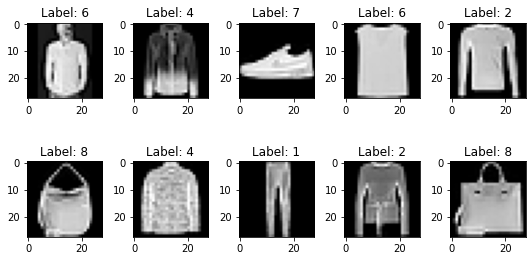

In [ ]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      
      # x, y = reshape_input(x, y)
      # print(y)
      # print(torch.argmax(y))
      # print(y.shape)
      # print(x.shape)
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")
      
  plt.tight_layout()
  plt.show()
plot_samples()

## Fonctions à compléter

In [ ]:
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = y.shape[0]
 
    # todo : calcul du nombre d'éléments bien classifiés.
    # card_C=((torch.eq(y,y_pred).sum(1))==10).sum().item()
    card_C=torch.sum(torch.argmax(softmax( y_pred), axis=1) == torch.argmax(y, axis=1))
    
    # todo : calcul de la précision de classification.
    acc = card_C/card_D
 
    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        # print(xentrp)
        _, (n_acc, n_samples) = accuracy(y, y_pred)
        # print(f'No. accurate:{n_acc}')
        # print(f'No. of sample:{n_samples}')

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc
        # print(loss)
    # print(f"total  loss: {loss}")
    loss = loss / float(cardinal)
    # print(f"cardinal is: {cardinal}")
    # print(f"mean loss:{loss}")
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def cross_entropy(y, y_pred): 
    # todo : calcul de la valeur d'entropie croisée.
    loss=(-1) *torch.sum(y*torch.log(softmax(y_pred)))
    return loss

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))

    # todo : calcul des valeurs de softmax(x)
    max,idx=torch.max(x, axis, keepdims=True)
    x=torch.subtract(x,max)
    values=torch.divide(torch.exp(x),torch.sum(torch.exp(x), axis=-1, keepdims=True))
    values=torch.clip(values, min=1e-5, max=1-1e-5)
    return values
  
def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    x_tilde = torch.cat((x, torch.Tensor([[1]]*len(x))), axis)
    return x_tilde

In [ ]:
class LinearModel:
    def __init__(self, num_features, num_classes):
      self.params = torch.normal(0, 0.01, (num_features + 1, num_classes)) #theta random initialization (785,10)
      
      self.t = 0 
      self.m_t = 0 # pour Adam: moyennes mobiles du gradient
      self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient
        
    def forward(self, x):
      # todo : implémenter calcul des outputs en fonction des inputs `x`.
      inputs = inputs_tilde(x)
      outputs = torch.matmul(inputs,self.params) #theta*x matrix multiplication of (batch_size,785)*(785,10) result y_pred:(batch_size,10)
      return outputs

    def get_grads(self, y, y_pred, X): 
      # todo : implémenter calcul des gradients.
      grads = (1/len(y)) * (torch.matmul(inputs_tilde(X).T,softmax( y_pred))-torch.matmul(inputs_tilde(X).T,y)) #(785,batch_size)*(batch_size,10) grads:(785,10)
      return grads

    def sgd_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      self.params=self.params-lr*grads #(785,10)-lr*(785,10)
      # return self.params
    
    def adam_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      beta_1 = 0.9
      beta_2 = 0.999
      epsilon = 1e-8

      self.m_t = beta_1*self.m_t + (1-beta_1)* grads
      self.v_t = beta_2*self.v_t + (1-beta_2)* (grads * grads)
      self.t +=1	
      m_t_c = self.m_t/(1-(beta_1**self.t))	
      v_t_c = self.v_t/(1-(beta_2**self.t))
      self.params = self.params - (lr*m_t_c)/(torch.sqrt(v_t_c)+epsilon)

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    
    best_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
          # print(f"epoch is: {epoch}")
          for x, y in data_loader_train:
              x, y = reshape_input(x, y)
              y_pred = model.forward(x)
              loss = cross_entropy(y, y_pred) #is it needed to calculate loss?
              grads = model.get_grads(y, y_pred, x)
              if sgd:
                model.sgd_update(lr, grads)
                # print(model.params.shape)
              else:
                model.adam_update(lr, grads)
        
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)
        # print(f"accuracy of valid:{accuracy_val}")
        
        if accuracy_val > best_accuracy:
          pass   # TODO : record the best model parameters and best validation accuracy
          best_accuracy=accuracy_val
          best_val_accuracy=best_accuracy
          best_model=model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 5 == 0: # prints every 5 epochs, you can change it to % 1 for example to print each epoch
          print(f"Epoch {epoch:2d}, \
                  Train: loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1,20,200,1000]   # Define ranges in a list
lr_list = [0.001, 0.01, 0.1]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.299, accuracy=7.8%,                   Valid: loss=2.298, accuracy=7.8%
Epoch  5,                   Train: loss=0.441, accuracy=84.7%,                   Valid: loss=0.459, accuracy=84.6%
validation accuracy = 84.683
------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 20
Epoch  0,                   Train: loss=2.323, accuracy=12.8%,                   Valid: loss=2.321, accuracy=13.3%
Epoch  5,                   Train: loss=0.666, accuracy=79.0%,                   Valid: loss=0.687, accuracy=78.5%
validation accuracy = 78.450
------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 200
Epoch  0,                   Train: loss=2.308, accuracy=5.9%,                   Valid: loss=2.309, accuracy=5.9%
Epoch  5,                   Train: loss=1.201, accuracy=67.3%,                   Valid: loss=1.196, 

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000 
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 84.7  | 78.5 | 67.5 | 64.2 | - |
**0.01** | 84.6  | 84.5 | 79.2 | 70.1 | - |
**0.001**  | 83.1  | 84.6 | 84.6 | 80.9 | - |

### SGD: Analyse du meilleur modèle

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.314, accuracy=3.1%,                   Valid: loss=2.315, accuracy=3.4%
Epoch  5,                   Train: loss=0.434, accuracy=85.4%,                   Valid: loss=0.454, accuracy=85.2%
Best validation accuracy = 85.183
Evaluation of the best training model over test set
------
Loss : 0.474
Accuracy : 83.530


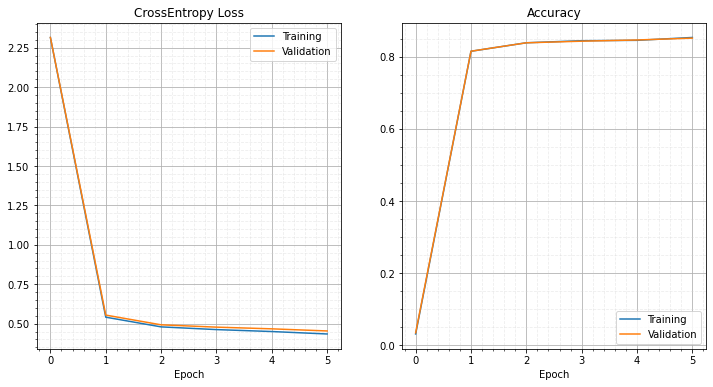

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1,20,200,1000]   # Define ranges in a list  
lr_list = [0.001, 0.01, 0.1]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.315, accuracy=10.2%,                   Valid: loss=2.315, accuracy=10.0%
Epoch  5,                   Train: loss=1.106, accuracy=85.3%,                   Valid: loss=1.306, accuracy=83.3%
validation accuracy = 83.300
------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 20
Epoch  0,                   Train: loss=2.299, accuracy=10.1%,                   Valid: loss=2.298, accuracy=10.5%
Epoch  5,                   Train: loss=0.531, accuracy=84.2%,                   Valid: loss=0.594, accuracy=83.2%
validation accuracy = 83.550
------------------------------------------------------------------
Training model with a learning rate of 0.001 and a batch size of 200
Epoch  0,                   Train: loss=2.303, accuracy=15.3%,                   Valid: loss=2.301, accuracy=15.2%
Epoch  5,                   Train: loss=0.407, accuracy=85.5%,                   Valid: loss=0.4

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000 
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 83.3  | 83.55 | 84.4 | 85.3 | - |
**0.01** | 84.28  | 84.05 | 85.43 | 84.3 | - |
**0.001**  | 82.75  | 84.9 | 85.1 | 84.63 | - |

### Adam: Analyse du meilleur modèle

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train: loss=2.288, accuracy=13.8%,                   Valid: loss=2.289, accuracy=13.5%
Epoch  5,                   Train: loss=0.408, accuracy=86.1%,                   Valid: loss=0.443, accuracy=84.6%
Best validation accuracy = 84.617
Evaluation of the best training model over test set
------
Loss : 0.484
Accuracy : 83.790


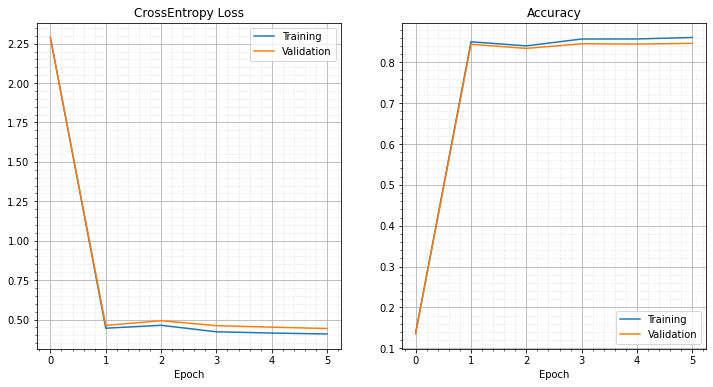

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 200 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

## Analyse des Résultats

### Dans la régression logistique à une seule couche, les performances de Mini-batch GD et d'Adam sont proches l'une de l'autre.
###Les résultats de mini-batch GD montrent que batch-size=1 a les meilleures performances et généralement avec un taux d'apprentissage décroissant, nous aurons de meilleures performances. Cependant, la diminution des performances augmente le temps de fonctionnement.
### également en raison du petit nombre d'époques, la différence entre SGD et Adam n'est pas claire, mais on peut voir qu'Adam passe rapidement à des précisions plus élevées. 
###Veuillez également noter qu'en raison de l'initialisation aléatoire des paramètres, les résultats sont susceptibles de changer à chaque exécution. 

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathcal{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  ) 
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax: 
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (10 points) 
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente.Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Votre pseudocode:

#### Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$:



In [ ]:
for l=1 to L+1 do{
  if l==1 then{
    theta[l]= random assign matrix[785*300]
  }
  if l=L+1 then {
      theta[l]= random assign matrix[301*10]  #K=10
  }

  else then {
    theta[l]= random assign matrix[301*300]
  }
}

for epoch in epochs:{
  #feed forward
  h[0]=x_i # the input layer, x_i has bias row of 1
  for l=1 to L+1:{
    a[l]=h[l-1]%*%theta[l]
    if l<L+1 then{
        h[l]=Relu(a[l]) # Relu is activation function
    }
    elif l==L+1 then {
        h[l]=softmax(a[l])
    }
  }
    #backpropagation calculation
    for l=L+1 to 1:{
      if l==L+1 then{ #if output layer
          delta[l]=-(y-softmax(y_pred))       #backpropagation of fotmax with negative log-likelihood loss is (y_pre-y)
      }
      else then { #in the hidden layers
          delta[l]=(h[l]>0) * (theta[l+1]%*%delta[l+1])          #derivative of Relu is 1 if a>0 and if a<=0 it is 0 
      }
      #update parameter theta
      theta[l]=theta[l]+lr*h[l-1]*delta[l]

    }
  
}






## Fonctions à compléter

In [ ]:
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2''' 
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = y.shape[0]
 
    # todo : calcul du nombre d'éléments bien classifiés.
    # card_C=((torch.eq(y,y_pred).sum(1))==10).sum().item()
    card_C=torch.sum(torch.argmax(y_pred, axis=1) == torch.argmax(y, axis=1))
    
    # todo : calcul de la précision de classification.
    acc = card_C/card_D
 
    return acc, (card_C, card_D)


def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        #print(xentrp)
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    x_tilde = torch.cat((x, torch.Tensor([[1]]*len(x))), axis)
    return x_tilde

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    # todo : calcul des valeurs de softmax(x)
    max,idx=torch.max(x, axis, keepdims=True)
    x=torch.subtract(x,max)
    values=torch.divide(torch.exp(x),torch.sum(torch.exp(x), axis=-1, keepdims=True))
    values=np.clip(values, a_min=1e-4, a_max=1-1e-4)
    return values

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    loss=(-1) *torch.sum(y*torch.log(y_pred))
    #print(y_pred)
    return loss

def softmax_cross_entropy_backward(y, y_pred):
  
     # todo : calcul de la valeur du gradient de l'entropie croisée composée avec `softmax`
     values = (y_pred-y)   #-(y-y_pred)
     return values

def relu_forward(x):
    # todo : calcul des valeurs de relu(x)
    values = torch.maximum(x, torch.tensor(0))
    return values

def relu_backward(d_x, x):
    # todo : calcul des valeurs du gradient de la fonction `relu`
    x[x <= 0] = 0.0
    x[x > 0] = 1.0
    # print(x)
    values = x*d_x  
    return values
    

# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes
        self.params = []
        # todo : initialiser la liste des paramètres Teta de l'estimateur.
        for l in range(self.n_hidden_layers+1):
          if l==0:
            in_nodes = self.n_features
            out_nodes = self.n_hidden_features
          elif l==self.n_hidden_layers:
            in_nodes = self.n_hidden_features
            out_nodes = self.n_classes
          else:
            in_nodes = self.n_hidden_features
            out_nodes = self.n_hidden_features
          self.params.append(torch.normal(0, 0.01, (in_nodes + 1, out_nodes)))
          

        print(f"Teta params={[p.shape for p in self.params]}")

        self.a = [] # liste contenant le resultat des multiplications matricielles
        self.h = [] # liste contenant le resultat des fonctions d'activations

                
        self.t = 0
        self.m_t = [0]*len(self.params) # pour Adam: moyennes mobiles du gradient
        self.v_t = [0]*len(self.params) # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
        self.a = [] # liste contenant le resultat des multiplications matricielles
        self.h = []


        self.h.append(inputs_tilde(x).clone())
        # todo : implémenter calcul des outputs en fonction des inputs `x`.
        for l in range(self.n_hidden_layers+1):

          self.a.append(torch.matmul(self.h[l],self.params[l]))
          if l<self.n_hidden_layers:

            self.h.append(inputs_tilde(relu_forward(self.a[l])))
          elif l==self.n_hidden_layers:

            self.h.append(softmax(self.a[l]))
            outputs = softmax(self.a[l])

        return outputs

    def backward(self, y, y_pred):

        grads = [None]*(len(self.params))
        delta=[None]*(self.n_hidden_layers+2)
        # todo : implémenter calcul des gradients.
        #grads = (1/len(y)) * (torch.matmul(inputs_tilde(X).T,softmax( y_pred))-torch.matmul(inputs_tilde(X).T,y))  #(785,batch_size)*(batch_size,10) grads:(785,10)
        for l in range(self.n_hidden_layers+1,0,-1):
          if l==self.n_hidden_layers+1:
            delta[l]=softmax_cross_entropy_backward(y, y_pred)   #list assignment index out of range

          else:            
            delta[l]=relu_backward(torch.matmul(self.params[l][:-1,:],delta[l+1].T).T, self.h[l][:,:-1])

          grads[l-1]=torch.matmul(delta[l].T,self.h[l-1])
                                        
        return grads

    def sgd_update(self, lr, grads):
       # TODO : implémenter mise à jour des paramètres ici.
      for l in range(len(self.params)):
         self.params[l]=self.params[l]-lr*grads[l].T 

      

    
    def adam_update(self, lr, grads):
        # TODO : implémenter mise à jour des paramètres ici.
        beta_1 = 0.9
        beta_2 = 0.999
        epsilon = 1e-8
        self.t +=1
        for l in range(0, len(self.params)):
          self.m_t[l] = beta_1*self.m_t[l] + (1-beta_1)* grads[l].T 
          self.v_t [l]= beta_2*self.v_t[l] + (1-beta_2)* (grads[l].T * grads[l].T)
            
          m_t_c = self.m_t[l]/(1-(beta_1**self.t))	
          v_t_c = self.v_t[l]/(1-(beta_2**self.t))
          self.params[l] = self.params[l] - (lr*m_t_c)/(torch.sqrt(v_t_c)+epsilon)


def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            # print(f'epch is {epoch}')
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads  = model.backward(y, y_pred)

                if sgd:
                  model.sgd_update(lr, grads)
                else:
                  model.adam_update(lr, grads)
        
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          # TODO : record the best model parameters and best validation accuracy
          best_accuracy=accuracy_val
          best_val_accuracy=best_accuracy
          best_model=model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if epoch % 5 == 0: # prints every 5 epochs, you can change it to % 1 for example to print each epoch
          print(f"Epoch {epoch:2d}, \
                  Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger

## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
WAND_DISABLE=True

# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25,100,300,500,1000]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 20   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([785, 25]), torch.Size([26, 10])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train:loss=2.303, accuracy=8.0%,                   Valid: loss=2.303, accuracy=7.8%
Epoch  5,                   Train:loss=0.403, accuracy=85.6%,                   Valid: loss=0.426, accuracy=85.0%
validation accuracy = 85.133
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Teta params=[torch.Size([785, 100]), torch.Size([101, 10])]
Epoch  0,                   Train:loss=2.302, accuracy=15.3%,                   Valid: loss=2.302, accuracy=15.0%
Epoch  5,                   Train:loss=0.393, accuracy=85.6%,                   Valid: loss=0.425, accuracy=84.6%
validation accuracy = 84.650
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 300 units
Teta params=[torch.Size([785, 300]), torch.Size([301, 10])]
Epoch  0,                   Train:loss=2.305, accuracy=8.9%,                   Valid: loss=2.305, accura

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000 
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 85.13  | 84.65 | 86.9 | 87.1 | 87.1 |
**3** | 9.9  | 77.7 | 84.9 | 85.2 | 85.6 |
**5**  | 10.53  | 10.417 | 10.567 | 10.03 | 83.2 |

### SGD: Analyse du meilleur modèle

Teta params=[torch.Size([785, 500]), torch.Size([501, 10])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train:loss=2.304, accuracy=6.0%,                   Valid: loss=2.304, accuracy=6.4%
Epoch  5,                   Train:loss=0.368, accuracy=87.0%,                   Valid: loss=0.370, accuracy=87.3%
Best validation accuracy = 87.317
Evaluation of the best training model over test set
------
Loss : 0.414
Accuracy : 85.230


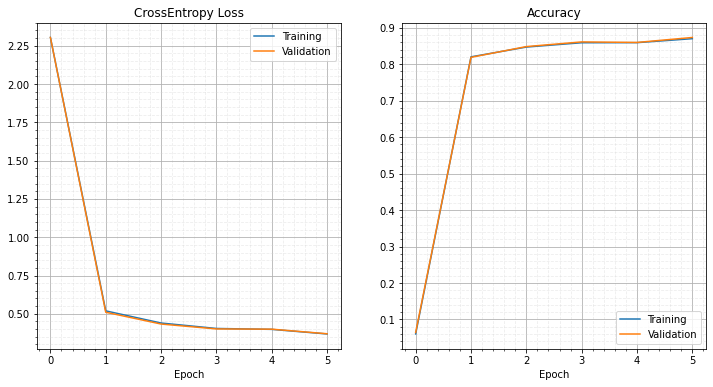

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 500    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001           # Some value
batch_size = 20   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
WAND_DISABLE=True
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25,100,300,500]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 20   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)
      
      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([785, 25]), torch.Size([26, 10])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train:loss=2.303, accuracy=10.4%,                   Valid: loss=2.303, accuracy=10.4%
Epoch  5,                   Train:loss=0.352, accuracy=87.3%,                   Valid: loss=0.364, accuracy=86.8%
validation accuracy = 86.850
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Teta params=[torch.Size([785, 100]), torch.Size([101, 10])]
Epoch  0,                   Train:loss=2.304, accuracy=7.4%,                   Valid: loss=2.304, accuracy=7.3%
Epoch  5,                   Train:loss=0.289, accuracy=89.3%,                   Valid: loss=0.346, accuracy=87.9%
validation accuracy = 87.950
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 300 units
Teta params=[torch.Size([785, 300]), torch.Size([301, 10])]
Epoch  0,                   Train:loss=2.300, accuracy=11.4%,                   Valid: loss=2.300, accur

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000 
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 86.85  | 87.95 | 88.45 | 89.36 | - |
**3** | 78.8  | 83.5 | 84.8 | 82.383 | - |
**5**  | 76.300  | 72.92 | 80.77 | 83 | - |

### Adam: Analyse du meilleur modèle

Teta params=[torch.Size([785, 500]), torch.Size([501, 10])]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch  0,                   Train:loss=2.308, accuracy=6.1%,                   Valid: loss=2.308, accuracy=5.9%
Epoch  5,                   Train:loss=0.289, accuracy=89.5%,                   Valid: loss=0.350, accuracy=87.9%
Best validation accuracy = 88.900
Evaluation of the best training model over test set
------
Loss : 0.386
Accuracy : 87.000


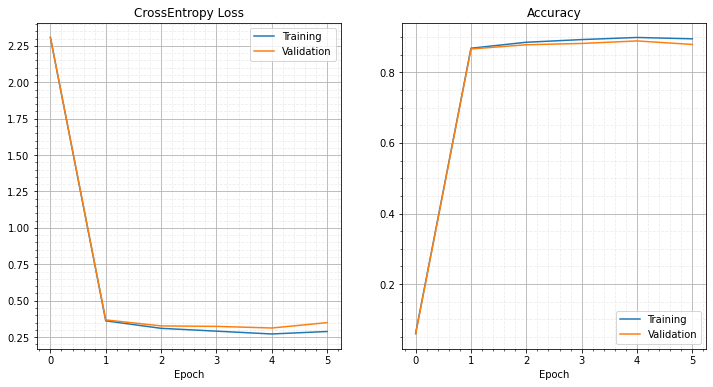

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 500    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001           # Some value
batch_size = 20   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=False, 
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

#Comme on peut le voir dans les tableaux des performances de SGD et d'Adam sur l'ensemble de données de validation, Adam fonctionne considérablement mieux que Mini-batch GD dans le réseau de neurones.
#Au fur et à mesure que le nombre de couches cachées augmente, le mini-lot GD donne de mauvaises performances.
#Le résultat de SGD et d'Adam montre que la précision de la validation augmente avec le nombre de neurones et diminue avec le nombre de couches cachées.  Adam prend beaucoup de temps à s'exécuter et il est presque impossible d'exécuter ADAM avec 1000 neurones sur chaque couche avec CPU.  
#Aussi, La performance d'Adam sur le jeu de données de test sont meilleures que celles de Mini-batch GD. 